In [1]:
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
#%config InlineBackend.figure_format = 'svg'

In [17]:
data = pd.read_csv('Data_Holland/mwl526_C.csv')
data.head()

,Pmin,Pmax,Pavg,Pref,Pcmin,Pcavg,Pcmax,Amin,Aavg,Amax,Ramin,Ramax,Ravg,Rain
0,-48,-47,-47.5,-47.50,-47.50,-47.50,-47.50,0.0,0.0,0.0,1.50,1.50,1.50,0
1,-47,-47,-47.0,-47.25,-47.25,-47.25,-47.25,0.0,0.0,0.0,1.25,1.25,1.25,0
2,-47,-47,-47.0,-47.00,-47.00,-47.00,-47.00,0.0,0.0,0.0,1.00,1.00,1.00,0
3,-47,-47,-47.0,-47.00,-47.00,-47.00,-47.00,0.0,0.0,0.0,1.00,1.00,1.00,0
4,-47,-47,-47.0,-47.00,-47.00,-47.00,-47.00,0.0,0.0,0.0,1.00,1.00,1.00,0


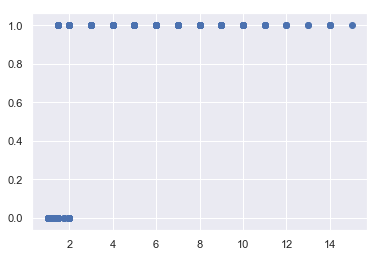

In [18]:
plt.scatter(data['Ramin'], data['Rain'])

In [19]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
xpts=np.array(data['Ramin'])
ypts=np.array(data['Ravg'])
zpts=np.array(data['Ramax'])
rpts=np.array(data['Rain'])
data1=np.vstack((xpts, ypts, zpts))
data1=data1.T
print(data1.shape)

(9027, 3)


In [20]:
num_one_targets = int(np.sum(rpts))
zero_targets_counter = 0
indices_to_remove = []
for i in range(rpts.shape[0]):
    if rpts[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)
            
data1 = np.delete(data1, indices_to_remove, axis = 0)
rpts = np.delete(rpts, indices_to_remove, axis = 0)
data1.shape

(1868, 3)

In [38]:
#val=data['Rain']
#obs=data[['Ramin','Ravg','Ramax']]

X = preprocessing.scale(data1)
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, rpts, test_size=0.20, shuffle=True)
X_train.shape

(1494, 3)

In [47]:
#X = preprocessing.scale(obs)
#kmeans = KMeans(6)
#kmeans.fit(X_train)
identified_clusters=kmeans.fit_predict(X_test)
#identified_clusters.reshape(-1,1)

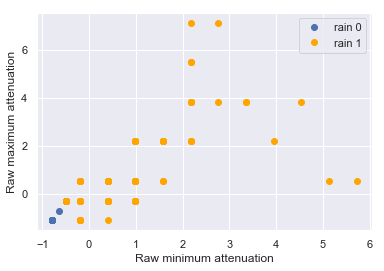

In [40]:
fig0, ax0 = plt.subplots()
for label in range(2):
    ax0.plot(X_test.T[0, y_test == label], X_test.T[2, y_test == label], 'o',
             color=colors[label], label='rain ' + str(label))
ax0.legend()
ax0.set_xlabel("Raw minimum attenuation")
ax0.set_ylabel("Raw maximum attenuation")
plt.savefig('kmeans_test_526_KM.eps')

In [45]:
#data_with_clusters=obs.copy()
#data_with_clusters['cluster']=identified_clusters

#For membership inversion
for k in range(identified_clusters.size):
    if(identified_clusters[k]==0):
        identified_clusters[k]=1
    else if(identified_clusters[k]==1):
        identified_clusters[k]=0

In [50]:
#for 3 centers clustering
for k in range(identified_clusters.size):
    if(identified_clusters[k]>=2):
        identified_clusters[k]=1

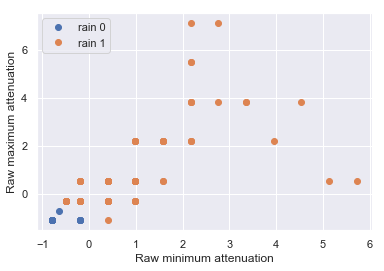

In [52]:
fig1, ax1 = plt.subplots()
ax1.set_title('')
k=1
for j in range(2):
    ax1.plot(X_test[identified_clusters == j, 0],
             X_test[identified_clusters == j, 2], 'o',
             label='rain ' + str(j))
ax1.legend(loc=2)
ax1.set_xlabel("Raw minimum attenuation")
ax1.set_ylabel("Raw maximum attenuation")
plt.savefig('kmeans_pred_526_KM2.eps')

In [1100]:
#plt.scatter(data['Ravg'], data['Rain'],c=kmeans.fit_predict(X), cmap='rainbow')
#plt.xlabel('Average raw attenuation')
#plt.ylabel('Rain')
#plt.savefig('cluster.eps')

In [1101]:
#ax = plt.axes(projection='3d')
#groups = ("coffee", "tea") 
#ax.scatter3D(data['Ramin'], data['Ravg'], data['Ramax'], c=kmeans.fit_predict(X), cmap='rainbow');
#plt.legend("coffee", "tea",loc=2)
#ax.set_xlabel('Ramin')
#ax.set_ylabel('Ravg')
#ax.set_zlabel('Ramax')

In [1144]:
kmeans.inertia_

595.7416145995589

In [1145]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(i)
    kmeans.fit(X_train)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)

In [1146]:
wcss

[3506.7656083581214,
 1896.0220244719283,
 1194.9181321061578,
 830.276122522402,
 493.0681727854782,
 370.12845980522513,
 290.912379121967,
 230.20619800306986,
 191.84151270266707,
 170.59579203243953]

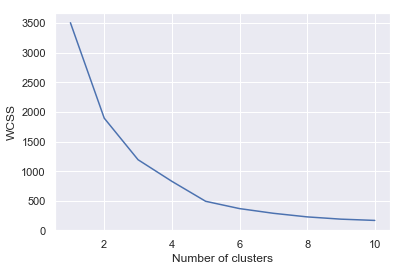

In [1387]:
numbers_clusters=range(1,11)
plt.plot(numbers_clusters,wcss)
#plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.eps')

In [1148]:
kmeans.score(X_test)

-339.18203683002105

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, identified_clusters))
print(classification_report(y_test, identified_clusters))

[[ 15 170]
 [  5 184]]
              precision    recall  f1-score   support

           0       0.75      0.08      0.15       185
           1       0.52      0.97      0.68       189

   micro avg       0.53      0.53      0.53       374
   macro avg       0.63      0.53      0.41       374
weighted avg       0.63      0.53      0.41       374



In [11]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, identified_clusters))

0.7661290322580645


In [1071]:
np.count_nonzero(identified_clusters)

315